출처 : https://compas.lh.or.kr/subj/past/data?subjNo=SBJ_2007_001
        
## 고양시 공공자전거 스테이션 최적지 선정 데이터셋

- 2017~ 19년 고양시 공공자전거 운영 이력 정보를 가지고, 최대 300대 개소를 어디에 위치할 지 조정 필요
- 한 스테이션에는 30개의 자전거 수용 가능

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
usage = pd.read_csv('./SBJ_2007_001/01.운영이력.csv')

/Users/jinseulpark/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


- LEAS_NO    대여 번호
- LEAS_DATE    대여 시간
- LEAS_STATION    대여 스테이션 번호
- LEAS_DEF_NO    대여 거치대 번호
- RTN_DATE    반납 시간
- RTN_STATION    반납 스테이션 번호
- RTN_DEF_NO    반납 거치대 번호
- RTN_PROCESS    관제반납구분값 (01:관제반납/02:관리자반납/03:관리자반출/04:타 사용자 반납/05:다른 사용자 반출)
- TRNV_QTY    추정 이동 거리(m)
- MEMB_DIV    회원 구분(비회원은 99이며 나머지는 정회원)
- MEMB_NO    회원 번호
- TEMP_MEMB_NO    비회원 번호
- BIKE_TAG    자전거 번호

In [3]:
usage.columns = usage.columns.str.lower()
# leas_no 

In [4]:
col_kr={'LEAS_NO':'대여 번호'
,'LEAS_DATE':'대여 시간'
,'LEAS_STATION':'대여 스테이션 번호'
,'LEAS_DEF_NO':'대여 거치대 번호'
,'RTN_DATE':'반납 시간'
,'RTN_STATION':'반납 스테이션 번호'
,'RTN_DEF_NO':'반납 거치대 번호'
,'RTN_PROCESS':'관제반납구분값 (01:관제반납/02:관리자반납/03:관리자반출/04:타 사용자 반납/05:다른 사용자 반출)'
,'TRNV_QTY':'추정 이동 거리(m)'
,'MEMB_DIV':'회원 구분(비회원은 99이며 나머지는 정회원)'
,'MEMB_NO':'회원 번호'
,'TEMP_MEMB_NO':'비회원 번호'
,'BIKE_TAG':'자전거 번호'}


In [5]:
usage.shape

(3142688, 14)

In [6]:
usage.describe()

,leas_no,leas_stat,leas_station,leas_def_no,rtn_station,rtn_def_no,trnv_qty,memb_no,temp_memb_no,rtn_process
count,3.142688e+06,3142688.0,3.142688e+06,3.142688e+06,3.142688e+06,3.142688e+06,2.747029e+06,3.142688e+06,3.142685e+06,410039.000000
mean,1.882270e+07,2.0,2.487533e+02,1.335679e+01,2.175205e+02,1.119356e+01,4.895855e+03,1.315026e+05,9.174356e+05,1.121984
std,1.674327e+06,0.0,6.367190e+01,7.404129e+00,1.017983e+02,8.703353e+00,1.264047e+04,9.720860e+04,1.587276e+06,0.590959
min,1.594554e+07,2.0,1.010000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,1.735176e+07,2.0,2.130000e+02,8.000000e+00,2.030000e+02,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
50%,1.883170e+07,2.0,2.460000e+02,1.300000e+01,2.320000e+02,1.100000e+01,0.000000e+00,1.849010e+05,0.000000e+00,1.000000
75%,2.029006e+07,2.0,3.090000e+02,1.800000e+01,3.070000e+02,1.700000e+01,0.000000e+00,2.065770e+05,3.191189e+06,1.000000
max,2.171861e+07,2.0,9.980000e+02,4.000000e+01,9.990000e+02,9.900000e+01,6.553500e+04,4.099376e+06,4.124667e+06,5.000000


대여 번호
대여 시간
대여 스테이션 번호
대여 거치대 번호
반납 시간
반납 스테이션 번호
반납 거치대 번호
추정 이동 거리(m)
회원 구분(비회원은 99이며 나머지는 정회원)
회원 번호
비회원 번호
자전거 번호
관제반납구분값 (01:관제반납/02:관리자반납/03:관리자반출/04:타 사용자 반납/05:다른 사용자 반출)
1.0    391188
3.0     12693
5.0      6158
Name: rtn_process, dtype: int64


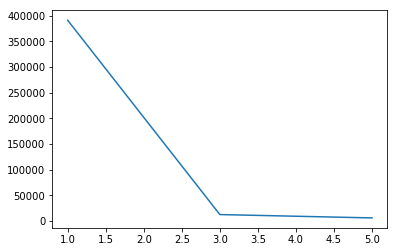

In [9]:
for i in usage.columns.to_list():
    try:
        print(col_kr[i.upper()])
        nunique_cnt =usage[i].nunique()
        if nunique_cnt < 10:
            print(usage[i].value_counts())
            plt.plot(usage[i].value_counts())
    except:
        continue

In [10]:
usage.head()

,leas_no,leas_stat,leas_date,leas_station,leas_def_no,rtn_date,rtn_station,rtn_def_no,trnv_qty,memb_div,memb_no,temp_memb_no,bike_tag,rtn_process
0,15945541,2,2017-01-01 00:00:41,213,18,2017-01-01 00:13:52,260,17,0.0,6,164203,0.0,1A844000000BB7,NaN
1,15945542,2,2017-01-01 00:01:03,231,4,2017-01-01 00:50:24,231,17,31039.0,1,187551,0.0,1A844000000494,NaN
2,15945543,2,2017-01-01 00:01:50,119,14,2017-01-01 01:01:50,0,0,NaN,12,168994,0.0,1A844000000533,1.0
3,15945544,2,2017-01-01 00:02:09,121,17,2017-01-01 00:15:58,133,14,15490.0,12,183971,0.0,1A844000000731,NaN
4,15945545,2,2017-01-01 00:03:32,320,29,2017-01-01 00:18:44,259,27,0.0,12,167475,0.0,1A84400000F343,NaN


In [12]:
usage.leas_station.unique()

156

In [ ]:
usage['rtn_date'] - usage['leas_date']